[View in Colaboratory](https://colab.research.google.com/github/yash12khandelwal/SpeedBumpDetection/blob/master/Bump_v2.ipynb)

In [0]:
from os import path
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())

accelerator = 'cu80' if path.exists('/opt/bin/nvidia-smi') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.3.0.post4-{platform}-linux_x86_64.whl torchvision

In [0]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
from torch.autograd import Variable 
from torch.utils.data import Dataset, DataLoader

from torch.autograd import Variable
from PIL import Image

%matplotlib inline

In [0]:
!pip install -U -q PyDrive ## you will have to install for every colab session
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
json_import = drive.CreateFile({'id':'1jMrzzzkKu_TXpBcRHEjFKJTdqx_LHUsk'})
json_import.GetContentFile('final_data_2.npy')
Z1= np.load('final_data_2.npy')

In [0]:
json_import = drive.CreateFile({'id':'1kbQoxEJ85NWk4rERsFAbXpkF3KRUozQS'})
json_import.GetContentFile('final_data_1.npy')
Z2= np.load('final_data_1.npy')

In [0]:
json_import = drive.CreateFile({'id':'1WjVvm8w-LomdQL98-bcWw6HTavYoK0rL'})
json_import.GetContentFile('test3.npy')
Z_test= np.load('test3.npy')

In [0]:
#torch.set_default_tensor_type('torch.DoubleTensor')

Z_test shape:  (76, 120001)
label = 0.0


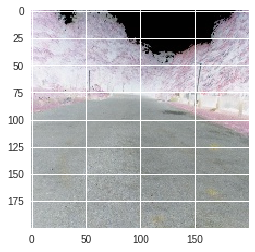

In [38]:
#Observing input data shapes

print("Z_test shape: ", Z_test.shape)

index = 49
plt.imshow(Z_test[index,1:].reshape(200,200,3),cmap="hot")
print("label = " + str(Z_test[index,0]))

In [0]:
#Combining the datasets
num_train_images = 2400 #from one file
Z=np.append(Z2[0:num_train_images],Z1[0:num_train_images],axis=0)

print("Z.shape: ", Z.shape)
Z1= None
Z2= None

#Remove the old files
del Z1
del Z2

1.0


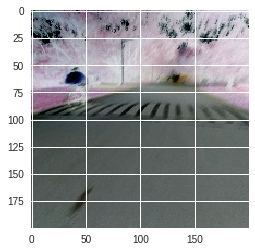

In [10]:
#Randomise the dataset
Z=np.take(Z,np.random.permutation(Z.shape[0]),axis=0,out=Z)

#Check test data one example

index=20
plt.imshow(Z_test[index,1:].reshape(200,200,3), cmap="hot")
print(Z_test[index,0])

In [0]:
def get_data():
  
    #X is reshaped from (num_examples, nx*ny*channels + 1(for label)) 
    #to (num_examples, 200, 200, 3)
    X_train = ((Z[:,1:]).reshape(Z.shape[0],3,200,200))/255
    
    Y_train = (Z[:,0]).reshape(Z.shape[0],1)
    
    #X_CV contains test images
    #shape of X_CV is (num_examples_test, 200, 200, 3)
    X_test = ((Z_test[:,1:]).reshape(Z_test.shape[0],3,200,200))/255
    
    #Y_CV contains test images labels
    #shape of Y_CV (num_examples_test, 1)
    Y_test = (Z_test[:,0]).reshape(Z_test.shape[0],1)
    
    print("X_train shape: ", X_train.shape)
    print("Y_train shape: ", Y_train.shape)
    print("X_test shape: ", X_test.shape)
    print("Y_test shape: ", Y_test.shape)
    
    return (X_train, Y_train, X_test, Y_test)

In [12]:
X_train, Y_train, X_test, Y_test = get_data()

X_train shape:  (3400, 3, 200, 200)
Y_train shape:  (3400, 1)
X_test shape:  (76, 3, 200, 200)
Y_test shape:  (76, 1)


In [0]:
X_train = torch.from_numpy(X_train)
Y_train = torch.from_numpy(Y_train)
X_test = torch.from_numpy(X_test)
Y_test = torch.from_numpy(Y_test)

In [14]:
print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)
print("X_test shape: ", X_test.shape)
print("Y_test shape: ", Y_test.shape)

X_train shape:  torch.Size([3400, 3, 200, 200])
Y_train shape:  torch.Size([3400, 1])
X_test shape:  torch.Size([76, 3, 200, 200])
Y_test shape:  torch.Size([76, 1])


In [0]:
class MyDataset(Dataset):
    """
    This dataset contains a list of numbers in the range [a,b] inclusive
    """
    def __init__(self, img, lab):
        super(MyDataset, self).__init__()
        
        self.images = img
        self.labels = lab
        
    def __len__(self):
        return self.images.shape[0]
        
    def __getitem__(self, index):
        x = self.images[index, :, :, :]
        y = self.labels[index, :]
        
        return x, y

In [0]:
data_train = MyDataset(X_train, Y_train)
trainloader = torch.utils.data.DataLoader(data_train, batch_size=80, shuffle=False)

data_test = MyDataset(X_test, Y_test)
testloader = torch.utils.data.DataLoader(data_test, batch_size=X_test.shape[0], shuffle=False)

In [17]:
for i, dataa in enumerate(testloader):
  _, labelsa = dataa
  print (labelsa)
  
  


    1
    1
    1
    1
    1
    1
    1
    1
    1
    1
    1
    1
    1
    1
    1
    1
    1
    1
    1
    1
    1
    1
    1
    1
    1
    1
    1
    1
    1
    1
    1
    1
    1
    1
    1
    1
    1
    1
    1
    1
    0
    0
    0
    0
    0
    0
    0
    0
    0
    0
    0
    0
    0
    0
    0
    0
    0
    0
    0
    0
    0
    0
    0
    0
    0
    0
    0
    0
    0
    0
    0
    0
    0
    0
    0
    0
[torch.DoubleTensor of size 76x1]



In [18]:
'''
index = 26

#Check that X_train corresponds to Y_train
print("Train image label: ", Y_train[index])
plt.imshow(X_train[index], cmap="hot")
'''

'\nindex = 26\n\n#Check that X_train corresponds to Y_train\nprint("Train image label: ", Y_train[index])\nplt.imshow(X_train[index], cmap="hot")\n'

In [19]:
'''
#Check that X_test corresponds to Y_test
print("Test image label: ", Y_test[index])
plt.imshow(X_test[index], cmap="hot")
'''

'\n#Check that X_test corresponds to Y_test\nprint("Test image label: ", Y_test[index])\nplt.imshow(X_test[index], cmap="hot")\n'

In [0]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
		# 3 input image channel, 32 output channels, 5x5 square convolution
    self.conv1 = nn.Conv2d(3, 32, 5 , 1 , 2)
		# 32 input image channel, 64 output channels, 5x5 square convolution
    self.conv2 = nn.Conv2d(32, 64, 5 , 1 , 2)
    # 64 input image channel, 1 output channels, 5x5 square convolution
    self.conv3 = nn.Conv2d(64, 1, 5 , 1 , 2)
		#fully connected layer with 16*5*5 input and 120 output neuros
    self.fc1 = nn.Linear(625, 512)
		#fully connected layer with 120 input and 84 output neuros
    self.fc2 = nn.Linear(512, 32)
		#fully connected layer with 84 input and 10 output neuros
    self.fc3 = nn.Linear(32, 1)
    


  def forward(self, x):
    drop_out1 = nn.Dropout(0.12)
    drop_out2 = nn.Dropout(0.12)
    drop_out3 = nn.Dropout(0.125)
    drop_out4 = nn.Dropout(0.13)
    drop_out5 = nn.Dropout(0.135)

    #x.shape = 4, 3, 200, 200
    #print("1 shape ", x.shape)
    
		#Max pooling a (2,2) window(relu over conv output)
    x = self.conv1(x)
    x = drop_out1(x)

    #print("2 shape ", x.shape)
    x = F.relu(x)
    #print("3 shape ", x.shape)
    x = F.max_pool2d(x, 2)
    #print("4 shape ", x.shape)
    

		#Max pooling a (2,2) window(relu over conv output) 
    x = self.conv2(x)
    x = drop_out2(x)

    #print("2 shape ", x.shape)
    x = F.relu(x)
    #print("3 shape ", x.shape)
    x = F.max_pool2d(x, 2)
    #print("4 shape ", x.shape)

    x=self.conv3(x)
    x = drop_out3(x)

    #Max pooling a (2,2) window(relu over conv output) 
    x = F.max_pool2d(F.relu(x), 2) #2 used to specify (2,2) square
    #print("last max pool shape ", x.shape)

    #feature flatening
    x = x.view(x.shape[0],-1)#-1 to approriately adjust size
    
    #print("flat shape ", x.shape)
    #relu activation
    x =F.relu(self.fc1(x))
    
    x = drop_out4(x)
    
    #relu activation
    x = F.relu(self.fc2(x))
    
    #x = drop_out5(x)

    
    x = self.fc3(x)
    return x

  '''
  def num_flat_features(self, x):
    size = x.size()[1:]
    num_features = 625
    for s in size:
      num_features *= s 
    return num_features
    '''

In [0]:
transformers = transforms.Compose ([
    transforms.ToPILImage(),
    transforms.RandomApply([transforms.ColorJitter(0.25, 0.25, 0.25, 0.25)], 0.51),
    transforms.RandomAffine(10),
    transforms.ToTensor()
])

In [33]:
#initialize the net
net = Net()

if torch.cuda.is_available():
  net=net.cuda()
  
optimizer = optim.Adam(net.parameters(), lr=0.0001, betas=(0.9,0.999), eps=1e-08) #optimizer

#running the net
for epoch in range(200): #set the no of epochs

  epoch_loss_train = 0.0 
  correct_epoch_train = 0
  for i, data in enumerate(trainloader, 0):
    
    #get inputs
    inputs, labels = data
    
    
    #wrap them in Variables
    #transform1 = transforms.ToPILImage()
    #inputs = transform1(inputs)
    #transform2 = transforms.ColorJitter()
    for j in range(len(data)):
      inputs[j] = transformers(inputs[j].float())/255
    inputs, labels = Variable(inputs), Variable(labels)
    #transform = transforms.Compose([
    inputs = inputs.float().cuda()
    labels = labels.float().cuda()

    #backprop
    outputs = net.forward(inputs).cuda()
    
    #loss function
    criterion = nn.BCEWithLogitsLoss() 
    loss = criterion(outputs, labels)

    #calculate accuracy
    outputs = F.sigmoid(outputs)
    outputs = (outputs > 0.5).float()
    correct_train = (outputs == labels).float().sum()
    correct_epoch_train += correct_train.data[0]    
    
    #initialize parameter gradients
    optimizer.zero_grad()
    
    loss.backward()
    optimizer.step()
    
    #print statsx
    epoch_loss_train += loss.data[0]
    
  correct_epoch_train /= X_train.shape[0]
  print('Epoch: %d\nLoss: %f' %(epoch +1, (1.0*epoch_loss_train)/X_train.shape[0] ))
  print("Train accuracy: ", 100.0*correct_epoch_train)
    
    
  
  correct_epoch_test = 0
  for i_test, test_data in enumerate(testloader, 0):
    inputs_test, labels_test = test_data
    
    inputs_test, labels_test = Variable(inputs_test), Variable(labels_test)
    
    inputs_test = inputs_test.float().cuda()
    labels_test = labels_test.float().cuda()
    
    outputs_test = net.forward(inputs_test).cuda()
    
    #calculate accuracy
    outputs_test = F.sigmoid(outputs_test)
    temp=outputs_test
    
    outputs_test = (outputs_test > 0.5).float()
    if(epoch%5==0):
      print(outputs_test-labels_test)
    correct_test = (outputs_test == labels_test).float().sum()
    correct_epoch_test += correct_test.data[0]
    print(temp)
  correct_epoch_test /= X_test.shape[0]  
  print("Test accuracy: ", 100.0*correct_epoch_test)

print('Finished Training')
torch.save(net, 'img_classify.pt')#saving model

Epoch: 1
Loss: 0.008768
Train accuracy:  50.0
Variable containing:
    0
    0
    0
    0
    0
    0
    0
    0
    0
    0
    0
    0
    0
    0
    0
    0
    0
    0
    0
    0
    0
    0
    0
    0
    0
    0
    0
    0
    0
    0
    0
    0
    0
    0
    0
    0
    0
    0
    0
    0
    1
    1
    1
    1
    1
    1
    1
    1
    1
    1
    1
    1
    1
    1
    1
    1
    1
    1
    1
    1
    1
    1
    1
    1
    1
    1
    1
    1
    1
    1
    1
    1
    1
    1
    1
    1
[torch.cuda.FloatTensor of size 76x1 (GPU 0)]

Variable containing:
 0.5077
 0.5068
 0.5072
 0.5065
 0.5071
 0.5084
 0.5057
 0.5060
 0.5067
 0.5046
 0.5067
 0.5048
 0.5102
 0.5072
 0.5051
 0.5079
 0.5056
 0.5027
 0.5057
 0.5054
 0.5053
 0.5074
 0.5081
 0.5034
 0.5062
 0.5067
 0.5057
 0.5083
 0.5067
 0.5058
 0.5060
 0.5047
 0.5048
 0.5056
 0.5063
 0.5046
 0.5059
 0.5058
 0.5045
 0.5045
 0.5049
 0.5064
 0.5052
 0.5073
 0.5074
 0.5064
 0.5060
 0.5077
 0.5068
 0.5076
 0.5062
 

KeyboardInterrupt: ignored

In [25]:
torch.save(net, 'bump_params.pt')

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:158: UserWarning: Couldn't retrieve source code for container of type Net. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
